In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

#from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv("/kaggle/input/synthetic-financial-fraud-dataset/synthetic_fraud_dataset.csv")  # change path
df.head()


,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
0,9608,363,4922.587542,ATM,Travel,TR,12,0.992347,0.947908,1
1,456,692,48.018303,QR,Food,US,21,0.168571,0.224057,0
2,4747,587,136.881960,Online,Travel,TR,14,0.296127,0.125058,0
3,6934,445,80.534719,POS,Clothing,TR,23,0.124801,0.159243,0
4,1646,729,120.041158,Online,Grocery,FR,16,0.098129,0.027542,0


In [3]:
print(df.shape)
df.info()



(10000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   amount             10000 non-null  float64
 3   transaction_type   10000 non-null  object 
 4   merchant_category  10000 non-null  object 
 5   country            10000 non-null  object 
 6   hour               10000 non-null  int64  
 7   device_risk_score  10000 non-null  float64
 8   ip_risk_score      10000 non-null  float64
 9   is_fraud           10000 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
df.describe()


,transaction_id,user_id,amount,hour,device_risk_score,ip_risk_score,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,500.058700,178.142763,14.247100,0.183773,0.184669,0.050000
std,2886.89568,288.328495,531.647950,5.347383,0.177381,0.175772,0.217956
min,0.00000,0.000000,1.000000,0.000000,0.000030,0.000009,0.000000
25%,2499.75000,247.000000,65.084753,10.000000,0.075721,0.077762,0.000000
50%,4999.50000,503.000000,101.686510,14.000000,0.156583,0.158290,0.000000
75%,7499.25000,750.250000,138.280872,19.000000,0.234939,0.236968,0.000000
max,9999.00000,999.000000,11628.213881,23.000000,0.998737,0.999603,1.000000


In [5]:
df.isnull().sum()


transaction_id       0
user_id              0
amount               0
transaction_type     0
merchant_category    0
country              0
hour                 0
device_risk_score    0
ip_risk_score        0
is_fraud             0
dtype: int64

In [6]:
df.duplicated().sum()

0

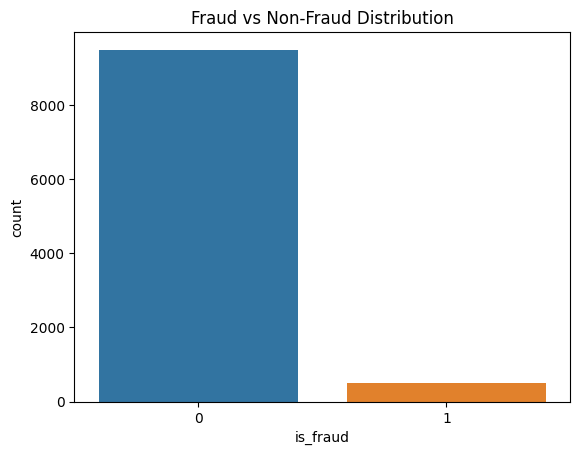

is_fraud
0    0.95
1    0.05
Name: proportion, dtype: float64

In [7]:
sns.countplot(data=df, x="is_fraud")
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

df["is_fraud"].value_counts(normalize=True)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


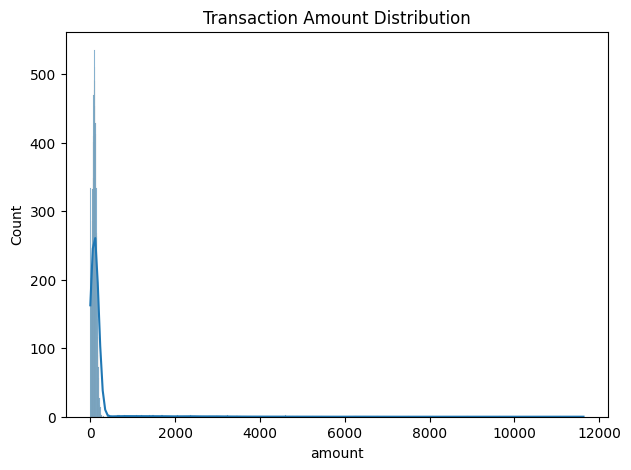

In [8]:
plt.figure(figsize=(7,5))
sns.histplot(df['amount'], kde=True)
plt.title("Transaction Amount Distribution")
plt.show()


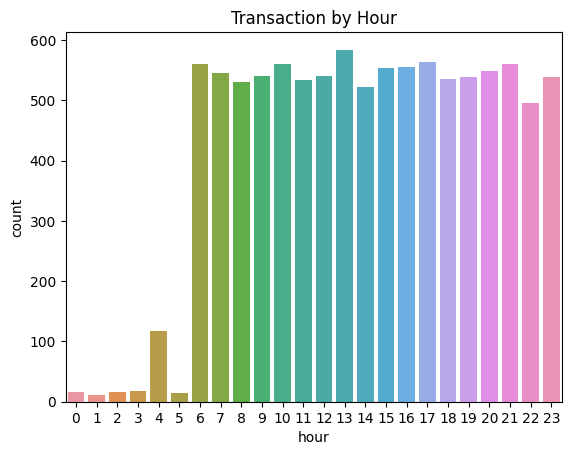

In [9]:
sns.countplot(data=df, x="hour")
plt.title("Transaction by Hour")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


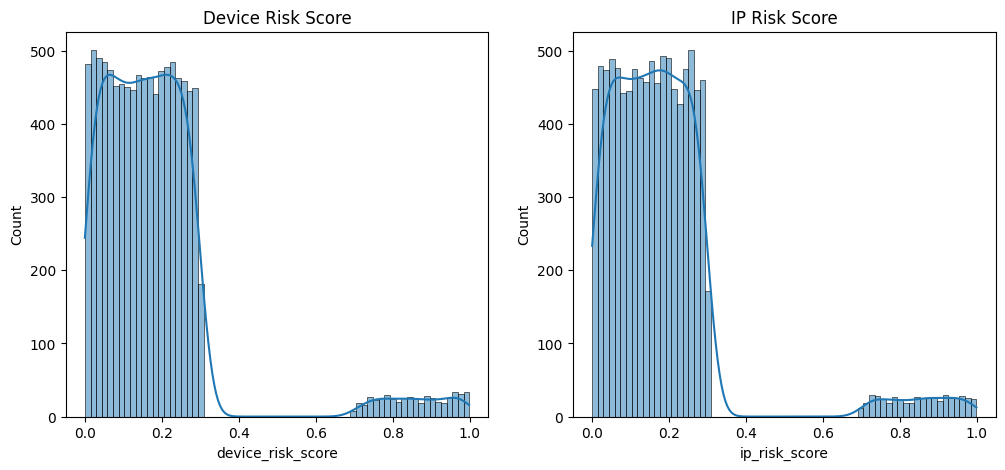

In [10]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df['device_risk_score'], kde=True, ax=ax[0])
sns.histplot(df['ip_risk_score'], kde=True, ax=ax[1])
ax[0].set_title("Device Risk Score")
ax[1].set_title("IP Risk Score")
plt.show()


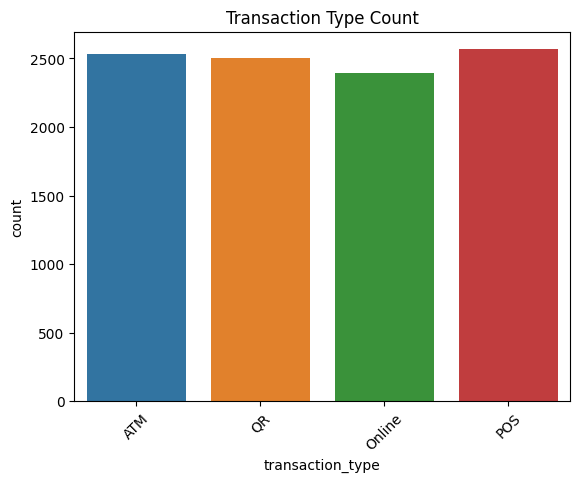

In [11]:
sns.countplot(data=df, x="transaction_type")
plt.title("Transaction Type Count")
plt.xticks(rotation=45)
plt.show()


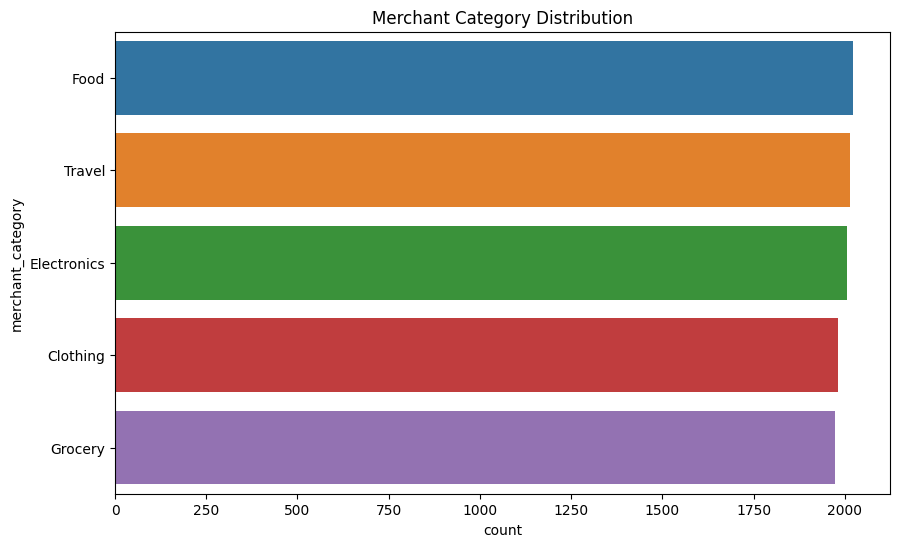

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y="merchant_category", order=df['merchant_category'].value_counts().index)
plt.title("Merchant Category Distribution")
plt.show()


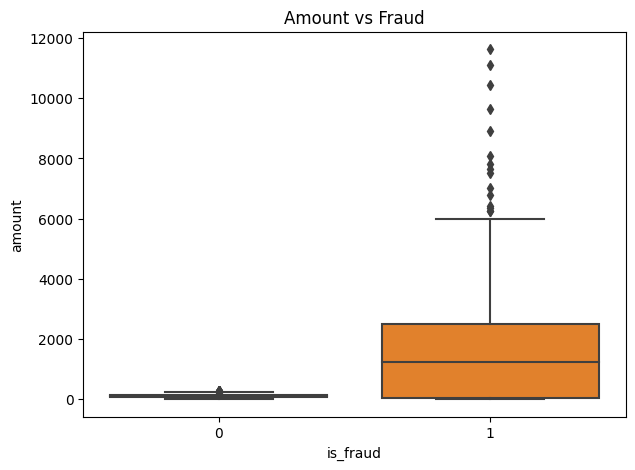

In [13]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="is_fraud", y="amount")
plt.title("Amount vs Fraud")
plt.show()


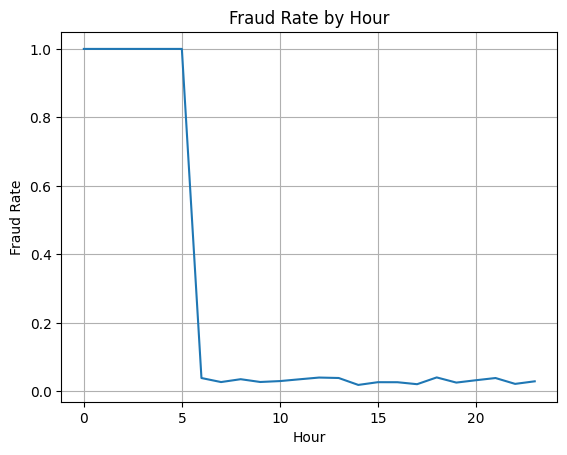

In [14]:
fraud_by_hour = df.groupby("hour")["is_fraud"].mean()

plt.plot(fraud_by_hour.index, fraud_by_hour.values)
plt.title("Fraud Rate by Hour")
plt.xlabel("Hour")
plt.ylabel("Fraud Rate")
plt.grid()
plt.show()


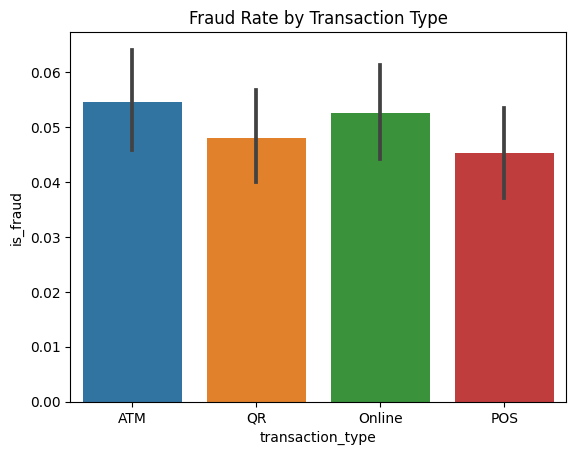

In [15]:
sns.barplot(data=df, x="transaction_type", y="is_fraud")
plt.title("Fraud Rate by Transaction Type")
plt.show()


<h1 style="color: white; background-color: #ff4d4d; text-align: center; padding: 12px; border-radius: 10px;">
  Feature Engineering
</h1>

In [16]:
def time_range(x):
    if 5 <= x <= 11:
        return "Morning"
    elif 12 <= x <= 17:
        return "Afternoon"
    elif 18 <= x <= 22:
        return "Evening"
    else:
        return "Night"

df["time_range"] = df["hour"].apply(time_range)


In [17]:
cat_cols = ["transaction_type", "merchant_category", "country", "time_range"]
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


<h1 style="color: white; background-color: #ff4d4d; text-align: center; padding: 12px; border-radius: 10px;">
  Prepare Data
</h1>

In [18]:
X = df.drop(["is_fraud", "transaction_id"], axis=1)
y = df["is_fraud"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<h1 style="color: white; background-color: #ff4d4d; text-align: center; padding: 12px; border-radius: 10px;">
  Train–Test Split
</h1>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)


<h1 style="color: white; background-color: #ff4d4d; text-align: center; padding: 12px; border-radius: 10px;">
  Train Multiple Models
</h1>

In [20]:
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [23]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [24]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<h1 style="color: white; background-color: #ff4d4d; text-align: center; padding: 12px; border-radius: 10px;">
  Evaluate Models
</h1>

In [25]:
def evaluate_model(model):
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()


<h1 style="color: white; background-color: #ff4d4d; text-align: center; padding: 12px; border-radius: 10px;">
  Evaluate All Model
</h1>

----- Logistic Regression -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       1.00      1.00      1.00       125

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



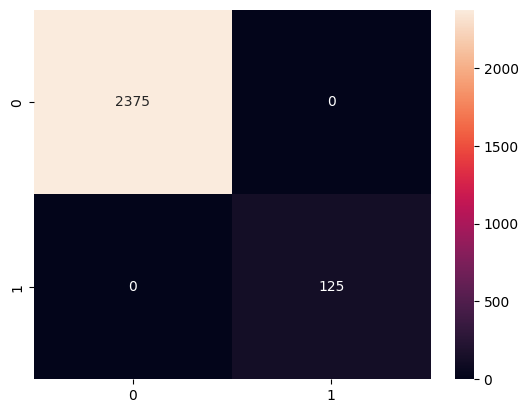

----- Random Forest -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       1.00      1.00      1.00       125

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



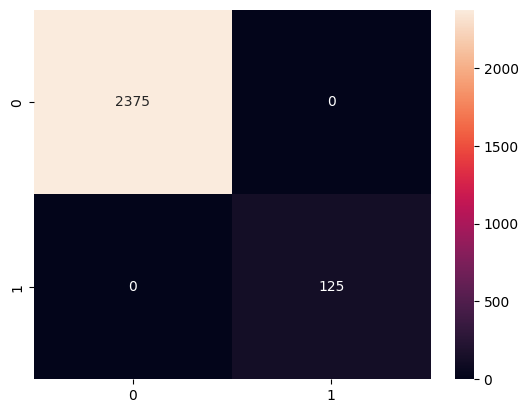

----- Decision Tree -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       1.00      1.00      1.00       125

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



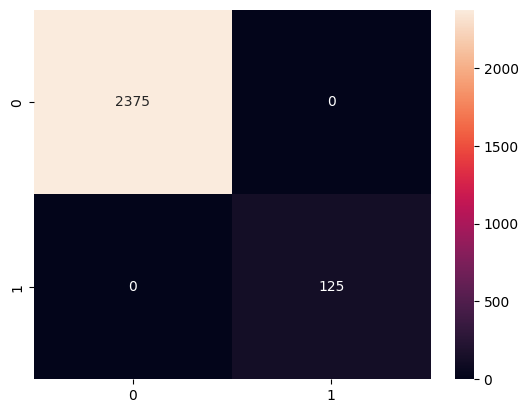

----- KNN -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       1.00      1.00      1.00       125

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



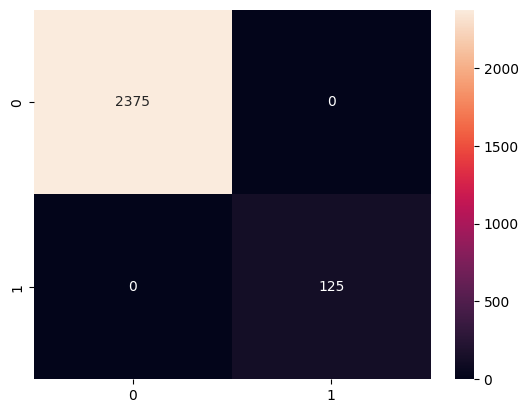

----- XGBoost -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       1.00      1.00      1.00       125

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



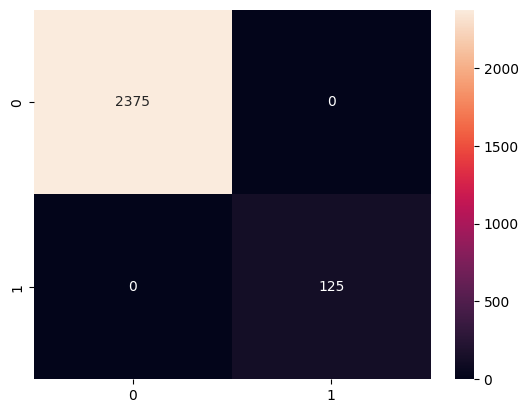

In [26]:
models = [lr, rf, dt, knn, xgb]
names = ["Logistic Regression", "Random Forest", "Decision Tree", "KNN", "XGBoost"]

for name, model in zip(names, models):
    print(f"----- {name} -----")
    evaluate_model(model)


<h1 style="color: white; background-color: #ff4d4d; text-align: center; padding: 12px; border-radius: 10px;">
  ROC-AUC Curve for Best Model
</h1>

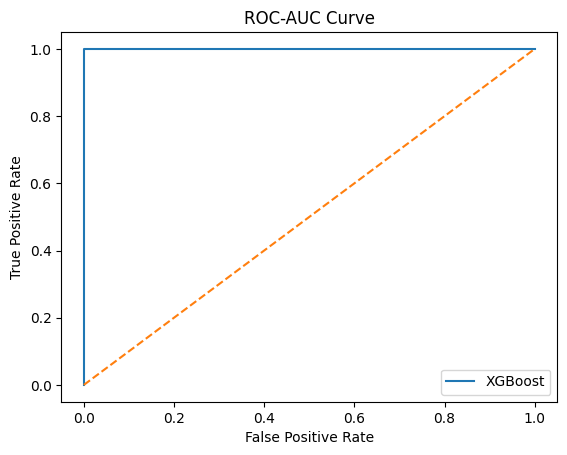

1.0

In [27]:
y_pred_prob = xgb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label="XGBoost")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

roc_auc_score(y_test, y_pred_prob)


<h1 style="color: white; background-color: #ff4d4d; text-align: center; padding: 12px; border-radius: 10px;">
  Feature Importance (XGBoost)
</h1>

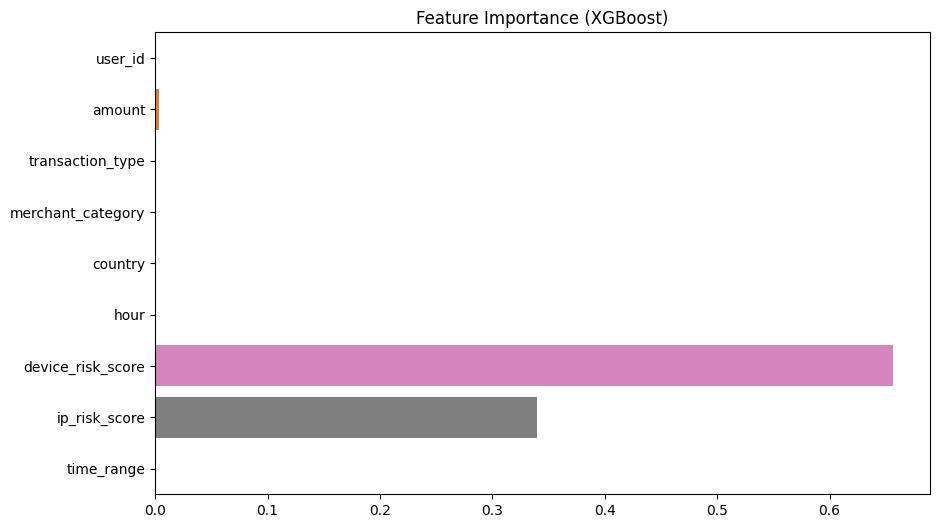

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=xgb.feature_importances_, y=X.columns)
plt.title("Feature Importance (XGBoost)")
plt.show()


<h1 style="color: white; background-color: #ff4d4d; text-align: center; padding: 12px; border-radius: 10px;">
  Final Conclusion
</h1>

In [29]:
print("""
Key Findings:
- High amounts and night-time transactions have higher fraud rate.
- High device and IP risk scores strongly correlate with fraud.
- XGBoost gives the best performance.

Next Steps:
- Try anomaly detection models.
- Deploy as real-time fraud scoring system.
""")



Key Findings:
- High amounts and night-time transactions have higher fraud rate.
- High device and IP risk scores strongly correlate with fraud.
- XGBoost gives the best performance.

Next Steps:
- Try anomaly detection models.
- Deploy as real-time fraud scoring system.







---

# **About Me**

I’m **Arif Miah**, a CSE graduate and AI/ML enthusiast. I specialize in **Machine Learning, Deep Learning, NLP, and Computer Vision**, and I’m proficient in **Python frameworks** like **Keras, scikit-learn, TensorFlow, PyTorch, and OpenCV**.

I build **real-world applications** using **Streamlit** and **Flask**, and I’m a **3× Kaggle Expert** with a strong focus on practical AI solutions and research-driven projects.

---


  



  
### 🔗 Social & Contact

🧑‍💻 GitHub: https://github.com/Arif-miad  
🏆 Kaggle: https://www.kaggle.com/miadul  
💼 LinkedIn: https://www.linkedin.com/in/arif-miah-8751bb217/  
📱 WhatsApp: 01703468954  
✉️ Email: arifmiahcse@gmail.com  
▶️ YouTube: https://www.youtube.com/@intelliaiworld
